# Shopify Challenge

Akash Nambiar

### Question 1

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. <br>
Ans :  The calculation in the question probably comes from simply taking the mean of the order amounts. Instead of this, by figuring out how much each shops charges for their sneaker helps identify an outlier that is giving us bad values. After removing outliers we are able to get a mean of 300.156

b. What metric would you report for this dataset?<br>
Ans : Matrices like median or mode would be helpful as it will not be affected by outliers

c. What is its value?<br>
Ans : Median = 284<br>
      Mode = 153

See the code below:

Answer 2 after the code

In [134]:
#Import necessary packages
import pandas as pd
import seaborn as sns

In [93]:
#Reading the data
data = pd.read_csv('ShopifyChallenge.csv')

Exploratory Data Analysis 

In [135]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,cost_per_order
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [136]:
data.describe()

,order_id,shop_id,user_id,order_amount,total_items,cost_per_order
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


In [130]:
#Check for missing values
data.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
cost_per_order    0
dtype: int64

In [132]:
# Check for duplicate values
data.duplicated().sum()

0

In [95]:
data.shop_id.nunique()

100

In [96]:
# Check for mean order amounts
data.order_amount.mean()

3145.128

From the above we could see that the mean value for 'order_amount' field is 3145.128 which is same as the naively calculated AOV value from the question. This would mean that the shops are selling the snekers for a very high price. We could validate it by calculating the prce of individual order as below

In [99]:
data['cost_per_order'] = data.order_amount/data.total_items

In [100]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,cost_per_order
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [144]:
data.cost_per_order.describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: cost_per_order, dtype: float64

From the above we could see that some shops sell sneakers at a cost of $90 which is reasonable, whereas some shops sells sneakers for upto $25725 which way too much for a pair a sneaker. We could now calculate the order amount per shop so that we could identify the shop which charges the extreme amounts for a pair of shoes

<AxesSubplot:xlabel='shop_id', ylabel='cost_per_order'>

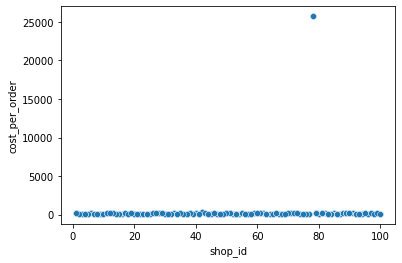

In [171]:
sns.scatterplot(y = 'cost_per_order', x = 'shop_id', data = data)

In [185]:
data[data.cost_per_order >250]['shop_id'].unique()

array([42, 78], dtype=int64)

Once the outlier orders are identified, they can be removed from the data and the mean can be calculated again

In [175]:
data_clean = data[(data['shop_id']!=78) & (data['shop_id']!=42)]

In [176]:
data_clean.order_amount.mean()

300.1558229655313

Other metrics that could be used to calculate Average Order Value would be Median and Mode

In [177]:
data.order_amount.median()

284.0

In [178]:
data.order_amount.mode()

0    153
Name: order_amount, dtype: int64

We can observe that removing the outliers has no impact on matrices like median and mode

In [179]:
data_clean.order_amount.median()

284.0

In [180]:
data_clean.order_amount.mode()

0    153
Name: order_amount, dtype: int64

### Question 2

a. How many orders were shipped by Speedy Express in total? <br>
Ans :

SELECT COUNT(DISTINCT O.OrderID) FROM Orders O, Shippers s WHERE O.ShipperID = S.ShipperId AND S.ShipperName = 'Speedy Express';

COUNT(DISTINCT o.OrderID)
54

b. What is the last name of the employee with the most orders?<br>
Ans : 

SELECT LastName from Employees where EmployeeID IN (SELECT EmployeeID FROM Orders GROUP BY EmployeeID ORDER BY COUNT(OrderID) DESC LIMIT 1);

LastName
Peacock


c. What product was ordered the most by customers in Germany?<br>
Ans: 

SELECT P.ProductName FROM Products P, OrderDetails D, Orders O, Customers C  WHERE P.ProductID = D.ProductID AND D.OrderID = O.OrderID AND O.CustomerID = C.CustomerID AND C.Country = 'Germany' GROUP BY P.ProductName ORDER BY SUM(D.Quantity) DESC LIMIT 1

ProductName
Boston Crab Meat
